In [4]:
# Пока что разборку файла буду делать в этом файле, в дальшем, возможно, нужно будет перенести в другой

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_iris

In [6]:
# Настраиваем файл
raw_data = pd.read_excel('data.xlsx')
raw_data = raw_data[['data', 'curs']]
curs = raw_data['curs']
raw_data

,data,curs
0,2019-09-07,65.9981
1,2019-09-10,65.5698
2,2019-09-11,65.4393
3,2019-09-12,65.4321
4,2019-09-13,65.1909
...,...,...
118,2020-03-03,66.3274
119,2020-03-04,66.4437
120,2020-03-05,66.0784
121,2020-03-06,66.1854


In [14]:
past = 7 * 4 # Обучение за 4 недели
future = 7 # Предсказание на неделю
start = past
end = len(raw_data)-future
data = []

In [15]:
j = 0
past_columns = ['past_{}'.format(i+1) for i in range(past)] # Название колонок
future_columns = ['future_{}'.format(i+1) for i in range(future)]
for i in range(start, end):
    past_future_values = curs[(i-past):(i+future)]
    data.append(list(past_future_values))

In [16]:
df = pd.DataFrame(data, columns = (past_columns + future_columns))
df

,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,past_10,...,past_26,past_27,past_28,future_1,future_2,future_3,future_4,future_5,future_6,future_7
0,65.9981,65.5698,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,...,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600
1,65.5698,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,63.8487,...,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600,63.9966
2,65.4393,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,63.8487,63.9453,...,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600,63.9966,63.8700
3,65.4321,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,63.8487,63.9453,63.7060,...,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600,63.9966,63.8700,63.8320
4,65.1909,64.4711,63.8272,64.1213,64.4290,64.2199,63.8487,63.9453,63.7060,64.1873,...,64.0144,63.9542,63.7606,63.6336,63.7997,63.8600,63.9966,63.8700,63.8320,63.8734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,61.2632,60.9474,61.4140,61.4328,61.5694,61.5333,61.4654,61.8552,61.8343,61.9515,...,63.4536,63.3085,63.7698,63.6873,63.7413,64.3008,64.9213,65.5177,65.6097,66.9909
84,60.9474,61.4140,61.4328,61.5694,61.5333,61.4654,61.8552,61.8343,61.9515,61.8031,...,63.3085,63.7698,63.6873,63.7413,64.3008,64.9213,65.5177,65.6097,66.9909,66.3274
85,61.4140,61.4328,61.5694,61.5333,61.4654,61.8552,61.8343,61.9515,61.8031,62.3380,...,63.7698,63.6873,63.7413,64.3008,64.9213,65.5177,65.6097,66.9909,66.3274,66.4437
86,61.4328,61.5694,61.5333,61.4654,61.8552,61.8343,61.9515,61.8031,62.3380,62.8299,...,63.6873,63.7413,64.3008,64.9213,65.5177,65.6097,66.9909,66.3274,66.4437,66.0784


In [17]:
# Создание обучение
X = df[past_columns][:-1]
y = df[future_columns][:-1]
# Проверка (Тест)
X_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]
y_test = y_test.iloc[0]

In [18]:
# Обучение модели на основе линейной регрессии
lin_regr = LinearRegression()
lin_regr.fit(X, y)
# Создаем предсказание
predict = lin_regr.predict(X_test)
predict = predict[0]
predict

array([64.91813565, 64.69327714, 65.28190129, 65.05489141, 65.87771484,
       65.55795837, 65.63644915])

Средняя ошибка:0.8761245916917103


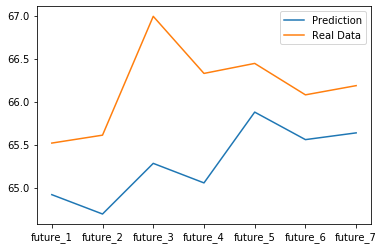

In [19]:
# Выводим график и среднюю ошибку
plt.plot(predict, label="Prediction")
plt.plot(y_test, label="Real Data")
print('Средняя ошибка:' + str(mean_absolute_error(predict, y_test)))
plt.legend()

Средняя ошибка:0.9791240000000231


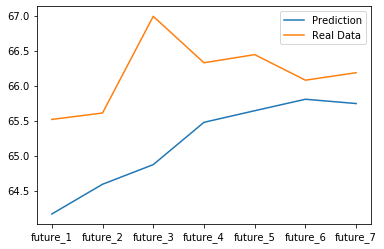

In [21]:
# Моделька на основе Random forest regressor
RFR = RandomForestRegressor(random_state = 42, n_estimators = 100, max_depth = 50)
RFR.fit(X, y)
# Создаем предсказание
predict = RFR.predict(X_test)
predict = predict[0]
# Выводим график и среднюю ошибку
plt.plot(predict, label="Prediction")
plt.plot(y_test, label="Real Data")
print('Средняя ошибка:' + str(mean_absolute_error(predict, y_test)))
plt.legend()